In [1]:
import os
import pandas as pd
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

def initialize_MTCNN():
    """
    Initialize Multi-Task Cascaded Convolutional Neural Networks (MTCNN) for face detection
    """
    mtcnn = MTCNN(keep_all = True)
    return mtcnn


def initialize_df(filepath):
    """
    Initializes an empty dataframe with predefined columns to store face detection results. The dataframe
    will have a column indicating the newspaper, the decade to which the newpaper issue (i.e., image) belongs to,
    the total number of faces detected in a given image, whether there are faces in the given image
    (0 = no, 1 = yes) and the percentage of pages that have faces on them.
    """
    df = pd.DataFrame(columns = ("Newspaper", "Decade", "Number of faces", "Present face", "Pages with faces (%)"))
    
    newspaper = filepath.split('-')[0]
    df.loc[len(df)] = [newspaper, 0, 0, 0, 0]
    return df


def get_decade(year):
    """
    The function extracts the decade for a given year by removing the last digit and replacing it with a zero.
    For example year 1789 will be 1780.
    """
    decade = str(year)[:3] + "0"
    return decade


def face_detection(image, mtcnn, df, newspaper, decade):
    """
    The function detects faces in a given input image using the MTCNN model.
    Then, it updates the dataframe with results
    """ 
    boxes, _ = mtcnn.detect(image)
    if boxes is not None:
        detected_faces = boxes.shape[0]
        #for i in range(detected_faces):
        df.loc[len(df)] = [newspaper, decade, detected_faces, 1, 0]
    else:
        df.loc[len(df)] = [newspaper, decade, 0, 0, 0]
    return df 


def process_newspaper(filepath, mtcnn, df):
    """
    The function iterates through all issues of the three newspapers. Then, it calls the function "face_detection"
    to detect faces in the issue and updates the dataframe accordingly. 
    """
    for newspaper in sorted(os.listdir(filepath)):
        newspaper_path = os.path.join(filepath, newspaper)
        for issue in sorted(os.listdir(newspaper_path)):
            issue_year = int(issue.split('-')[1])
            decade = get_decade(issue_year)
            issue_dir = os.path.join(newspaper_path, issue)
            print(issue_dir)
            image = Image.open(issue_dir)
            df = face_detection(image, mtcnn, df, newspaper, decade)
    return df


def calculate_pages_with_faces(df):
    """
    The function calculates the total number of faces, total number of pages, and percentage of pages with faces.
    """
    total_faces = df.groupby(["Newspaper", "Decade"]).sum(["Number of faces", "Present face"]).reset_index()
    total_pages = df.groupby(["Newspaper", "Decade"]).size().reset_index(name = "Number of Pages")
    pages_with_faces = total_faces.merge(total_pages, on = ["Newspaper", "Decade"])
    pages_with_faces["Decade"] = pages_with_faces["Decade"].astype(str)
    pages_with_faces["Pages with Faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of Pages"]) * 100
    return pages_with_faces


def plot(pages_with_faces, outpath):
    """
    Plots the percentage of pages with faces per decade and save the plot as an image.
    """
    sns.relplot(data = pages_with_faces, kind = "line", x = "Decade", y = "Pages with faces (%)", hue = "Newspaper")
    plt.title('Percentage of pages with faces per pecade')
    plt.savefig(outpath)
    return print("The plot has been saved to the out folder")


def save_df_to_csv(df, csv_outpath):
    """
    Save the dataframe as .csv 
    """
    df.to_csv(csv_outpath)
    return print("The results have been saved to the out folder")


In [12]:
filepath = os.path.join("../in")

mtcnn = initialize_MTCNN()

df = initialize_df(filepath)

In [ ]:
df = process_newspaper(filepath, mtcnn, df)

In [19]:
total_faces = df.groupby(["Newspaper", "Decade"]).sum(["Number of faces", "Present face"]).reset_index()

In [35]:
total_faces = df.groupby(["Newspaper", "Decade"]).agg({"Number of faces": "sum", "Present face": "sum"}).reset_index()
total_pages = df.groupby(["Newspaper", "Decade"]).size().reset_index(name = "Number of Pages")
pages_with_faces = pd.merge(total_faces, total_pages, on = ["Newspaper", "Decade"])
pages_with_faces["Pages with Faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of Pages"]) * 100
pages_with_faces["Decade"] = pages_with_faces["Decade"].astype(str)

In [57]:
pages_with_faces

,Newspaper,Decade,Number of faces,Present face,Number of pages,Pages with faces (%)
0,../in,0,0,0,1,0.000000
1,GDL,1790,3,3,20,15.000000
2,GDL,1800,10,9,36,25.000000
3,GDL,1810,2,2,26,7.692308
4,GDL,1820,1,1,32,3.125000
5,GDL,1830,2,2,36,5.555556
6,GDL,1840,0,0,24,0.000000
7,GDL,1850,2,2,24,8.333333
8,GDL,1860,1,1,24,4.166667
9,GDL,1870,1,1,24,4.166667


In [28]:
total_faces_2 = df.groupby(["Newspaper", "Decade"]).agg({"Number of faces": "sum", "Present face": "sum"}).reset_index()
total_pages_2 = df.groupby(["Newspaper", "Decade"]).size().reset_index(name="Number of Pages")
pages_with_faces_2 = pd.merge(total_faces_2, total_pages_2, on=["Newspaper", "Decade"])
pages_with_faces_2["Pages with Faces (%)"] = (pages_with_faces_2["Present face"] / pages_with_faces_2["Number of Pages"]) * 100
pages_with_faces_2["Decade"] = pages_with_faces_2["Decade"].astype(str)


In [41]:
def calculate_pages_with_faces(df):
    """
    The function calculates the total number of faces, total number of pages, and percentage of pages with faces.
    """
    total_faces = df.groupby(["Newspaper", "Decade"]).agg({"Number of faces": "sum", "Present face": "sum"}).reset_index()
    total_pages = df.groupby(["Newspaper", "Decade"]).size().reset_index(name = "Number of pages")
    pages_with_faces = pd.merge(total_faces, total_pages, on = ["Newspaper", "Decade"])
    pages_with_faces["Pages with faces (%)"] = (pages_with_faces["Present face"] / pages_with_faces["Number of pages"]) * 100
    pages_with_faces["Decade"] = pages_with_faces["Decade"].astype(str)
    return pages_with_faces

In [55]:
def plot(pages_with_faces, outpath):
    """
    Plots the percentage of pages with faces per decade and save the plot as an image.
    """
    plt.figure(figsize = (15, 10))
    pages_with_faces = pages_with_faces[pages_with_faces['Newspaper'].isin(['GDL', 'IMP', 'JDG'])]
    sns.relplot(data = pages_with_faces, kind = "line", x = "Decade", y = "Pages with faces (%)", hue = "Newspaper")
    plt.xticks(rotation = 45, fontsize = 8)
    plt.title('Percentage of pages with faces per pecade', fontsize = 12)
    plt.savefig(outpath)
    return print("The plot has been saved to the out folder")

The plot has been saved to the out folder


<Figure size 1500x1000 with 0 Axes>

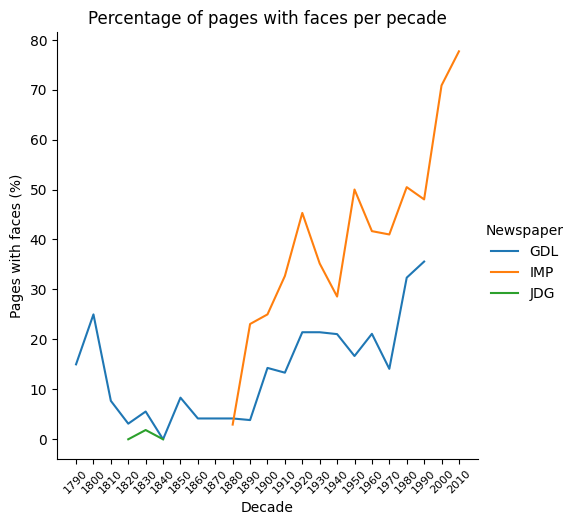

In [56]:
plot(pages_with_faces, "../out/face_plot.png")